### Portfolio Theory with Matrix Algebra

In [1]:
import yfinance as yf 
import numpy as np

In [13]:
import pandas as pd

In [2]:
#import two assets; sp500 and gold
tickers = ['^GSPC','GC=F']
df = yf.download(tickers,start='2010-01-01')['Adj Close']
df.head()

[*********************100%***********************]  2 of 2 completed


,GC=F,^GSPC
Date,,
2010-01-04,1117.699951,1132.989990
2010-01-05,1118.099976,1136.520020
2010-01-06,1135.900024,1137.140015
2010-01-07,1133.099976,1141.689941
2010-01-08,1138.199951,1144.979980


In [3]:
#return daily log returns 
ret_df = np.log(df/df.shift(1))
ret_df.head()

,GC=F,^GSPC
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.000358,0.003111
2010-01-06,0.015795,0.000545
2010-01-07,-0.002468,0.003993
2010-01-08,0.004491,0.002878


In [4]:
#note the correlation of the assets 
ret_df.corr()

,GC=F,^GSPC
GC=F,1.000000,0.043408
^GSPC,0.043408,1.000000


In [5]:
#note the development of the assets, through cummulative sum
ret_df.cumsum()

,GC=F,^GSPC
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.000358,0.003111
2010-01-06,0.016152,0.003656
2010-01-07,0.013684,0.007649
2010-01-08,0.018175,0.010527
...,...,...
2022-12-19,0.514071,1.237765
2022-12-20,0.529722,1.238801
2022-12-21,0.529722,1.253560


<AxesSubplot:xlabel='Date'>

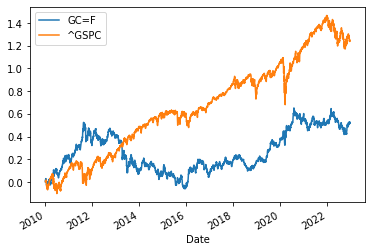

In [6]:
#plot
ret_df.cumsum().plot()
#note: SP500 has outperformed gold since 2013

<AxesSubplot:>

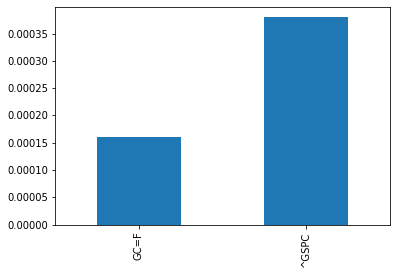

In [15]:
#Average return of both assets
ret_df.mean().plot(kind='bar')

In [16]:
#risk; standard deviation 
#note: gold has a lower standard deviation than SP500
ret_df.std()

GC=F     0.010224
^GSPC    0.011251
dtype: float64

In [18]:
#create weights vector
w = np.ones(len(ret_df.columns))/np.ones(len(ret_df.columns)).sum()
w

array([0.5, 0.5])

In [19]:
#Determine the expected return 
#note! the segment below is equivalent to ->  ret_df.mean().dot(w)
(w * ret_df.mean()).sum()

0.0002698092282834104

In [22]:
ret_df.cov()

,GC=F,^GSPC
GC=F,0.000105,0.000005
^GSPC,0.000005,0.000127


In [23]:
#Obtain the variance of the portfolio
# weight1^2*varianceAsset1 +... weightN^2*varianceAssetN + 2*weight1*weight2*covariance

(w[0]**2 * 0.000105) + (w[1]**2 * 0.000127) + (2*w[0]*w[1]*0.000005)

6.05e-05

In [24]:
#Obtain portfolio standard deviation to find risk-> sqrt(variance)
6.05e-05**(1/2)

0.007778174593052023

In [26]:
#Make risk calculation scalable
(w.T.dot(ret_df.cov().dot(w)))**(1/2)

0.007763754985706202

In [27]:
#return the Sharpe ratio of the assets -> mean/std
ret_df.mean() / ret_df.std()

GC=F     0.015663
^GSPC    0.033729
dtype: float64

In [28]:
#return the Sharpe ratio of the entire portfolio
ret_df.mean().dot(w) / (w.T.dot(ret_df.cov().dot(w)))**(1/2)

#note: comparing the SP of the portfolio and the individual assets,portfolio offers better risk adjusted return 

0.03475241410633828